Mean Squared Error: 1.2792424426675288
R-squared: 0.1272700705665114


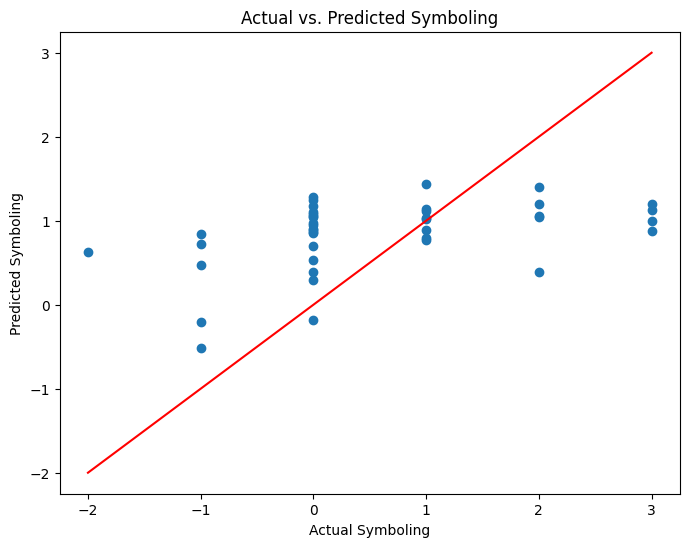

Coefficients: [ 0.01586584 -0.00130755  0.00015274 -0.05409465]
Intercept: 1.971477107557035


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import mglearn

# Load the dataset
try:
    df = pd.read_csv('/content/drive/MyDrive/machine learning/week 1/Automobile.csv')
except FileNotFoundError:
    print("Error: '/content/drive/MyDrive/machine learning/week 1/Automobile.csv' not found. Please upload the dataset or provide the correct file path.")
    exit()

# Check if 'symboling' column exists
if 'symboling' not in df.columns:
    print("Error: 'symboling' column not found in the dataset.")
    exit()

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Handle missing values (replace with mean for simplicity)
for col in ['horsepower', 'peak-rpm', 'curb-weight', 'stroke']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col] = df[col].fillna(df[col].mean())
    else:
        print(f"Warning: Column '{col}' not found in the dataset (case-sensitive check failed). Skipping...")

# Feature Selection (select relevant features)
# Use lowercase column names here as well
X = df[['horsepower', 'curb-weight', 'peak-rpm', 'stroke' ]]
y = df['symboling']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Symboling')
plt.ylabel('Predicted Symboling')
plt.title('Actual vs. Predicted Symboling')
plt.show()

# Display the coefficients of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

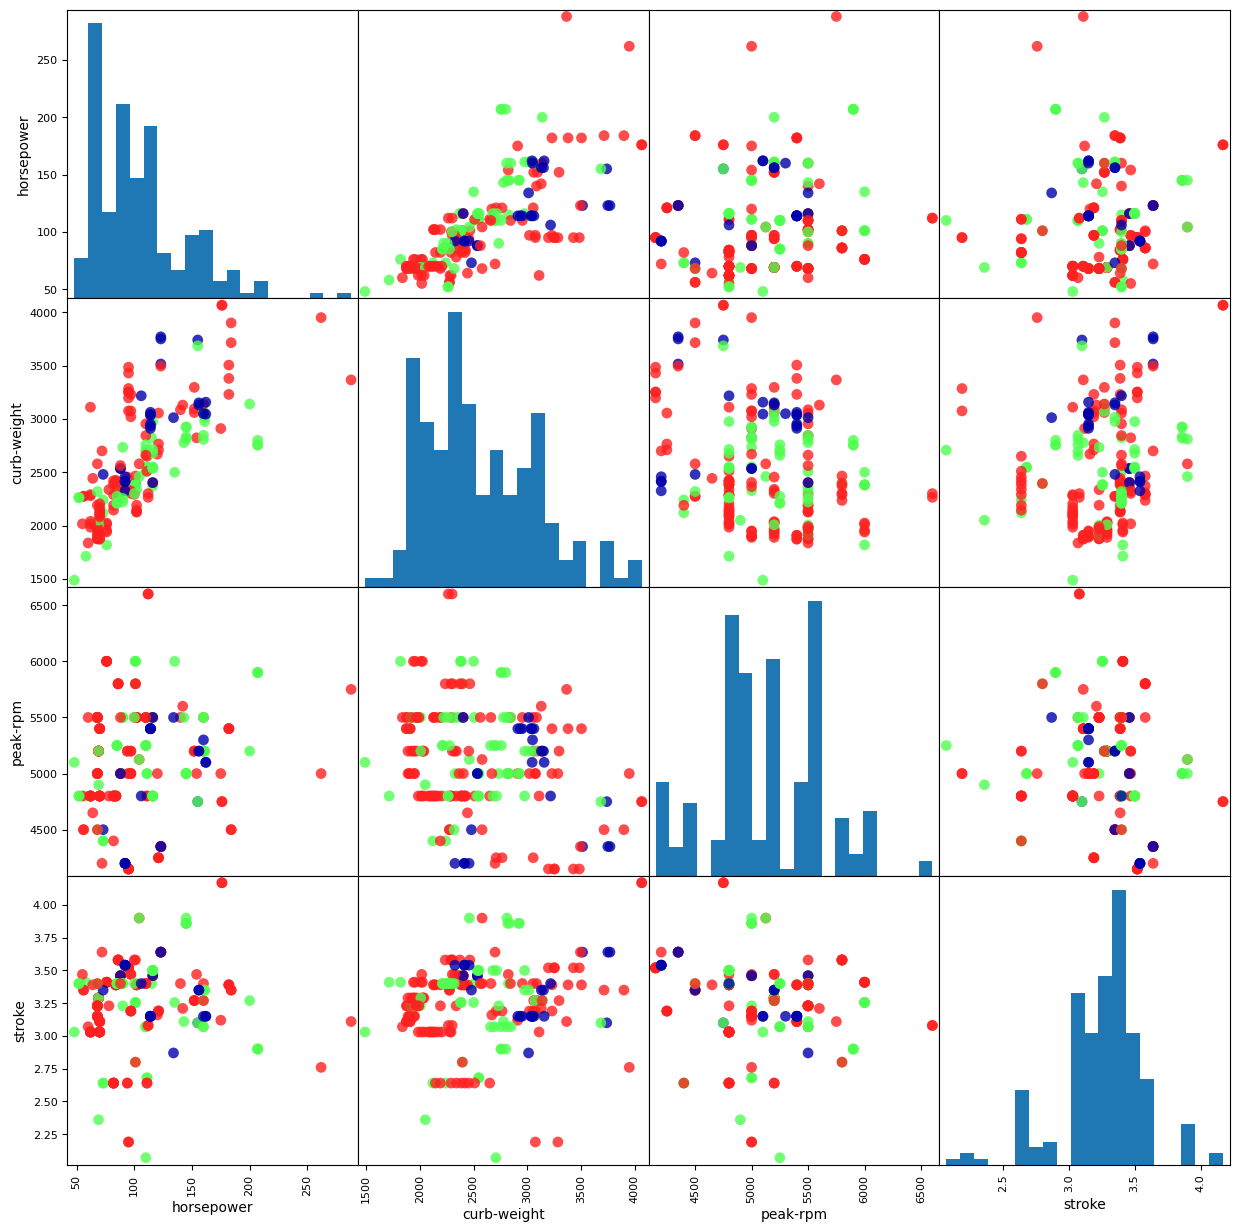

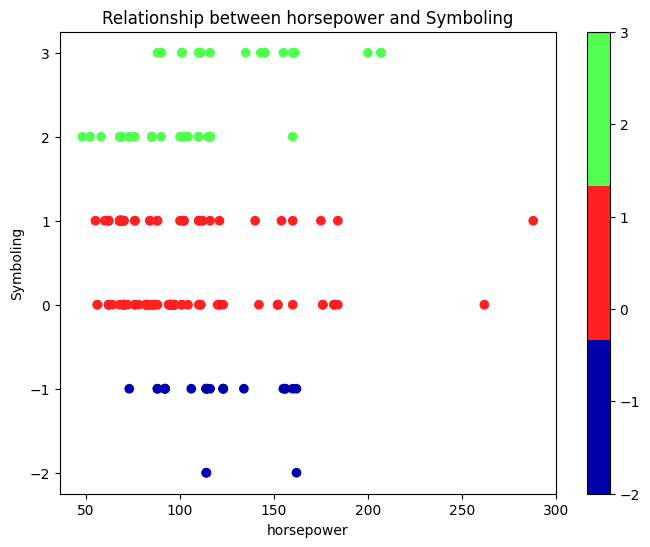

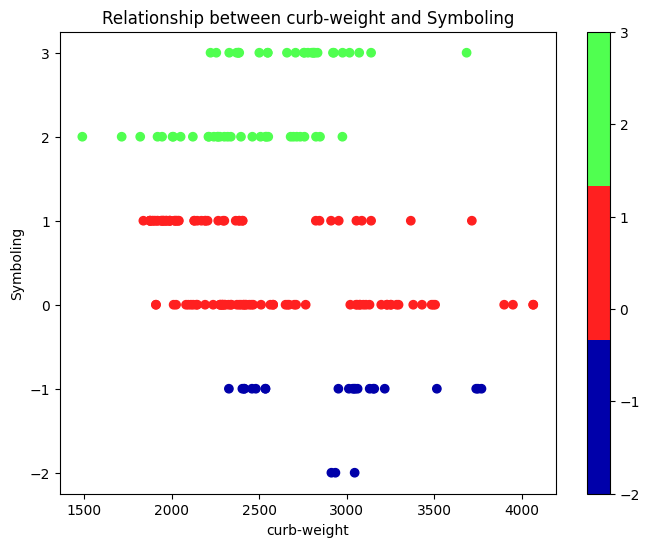

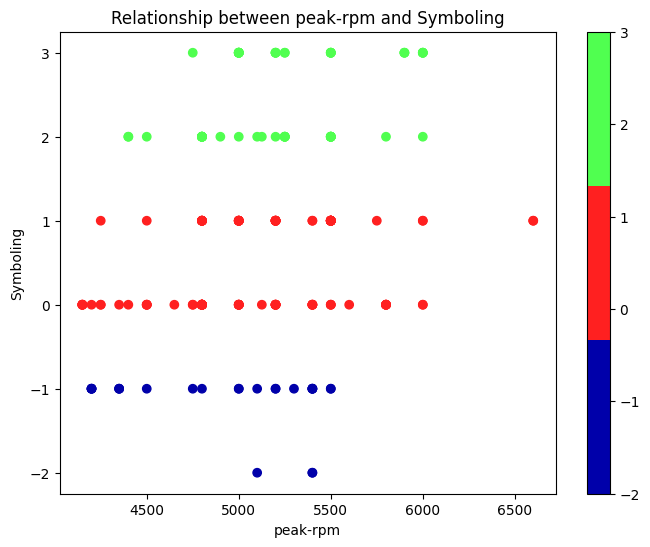

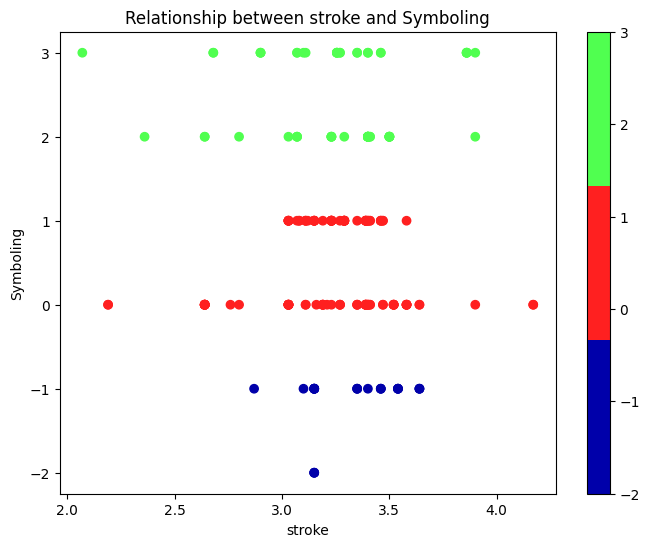

In [16]:
# prompt: visualkan dengan scikitlearn dan mglearn

import pandas as pd
import matplotlib.pyplot as plt
import mglearn

# Assuming X and y are already defined as in the previous code

# Visualize the pairwise relationships between features
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)
plt.show()

# Visualize the relationship between each feature and the target variable
for feature in X.columns:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, c=y, cmap=mglearn.cm3)  # Use mglearn colormap
    plt.xlabel(feature)
    plt.ylabel('Symboling')
    plt.title(f'Relationship between {feature} and Symboling')
    plt.colorbar()  # Show colorbar for better understanding of the color mapping
    plt.show()


Linear Regressiom Modelnya berbentuk:

𝑦 ^ = 𝑤 1 𝑥 1 + 𝑤 2 𝑥 2 + ⋯ + 𝑤 𝑛 𝑥 𝑛 + 𝑏 y ^​=w 1​x 1​+w 2​x 2​+⋯+w n​x n​+b Di mana:

𝑦 ^ y ^​adalah prediksi,

𝑥 1 , 𝑥 2 , … , 𝑥 𝑛 x 1​,x 2​,…,x n​adalah fitur input,

𝑤 1 , 𝑤 2 , … , 𝑤 𝑛 w 1​,w 2​,…,w n​adalah koefisien bobot,

𝑏 b adalah intercept.

MSE (Mean Squared Error):

MSE = 1 𝑛 ∑ 𝑖 = 1 𝑛 ( 𝑦 𝑖 − 𝑦 ^ 𝑖 ) 2 MSE= n 1​

i=1 ∑ n​(y i​− y ^​

i​) 2

Mengukur rata-rata kuadrat kesalahan prediksi.

RMSE (Root Mean Squared Error):

RMSE = MSE RMSE= MSE​

Memberi interpretasi kesalahan prediksi dalam satuan asli target.

R² (R-squared):

𝑅 2 = 1 − ∑ 𝑖 ( 𝑦 𝑖 − 𝑦 ^ 𝑖 ) 2 ∑ 𝑖 ( 𝑦 𝑖 − 𝑦 ˉ ) 2 R 2 =1− ∑ i​(y i​− y ˉ​) 2

∑ i​(y i​− y ^​

i​) 2